<div align="center">

**BỘ GIÁO DỤC VÀ ĐÀO TẠO**  
**TRƯỜNG ĐẠI HỌC ĐẠI HỌC MỎ - ĐỊA CHẤT**  

---

<h1>ĐỒ ÁN TỐT NGHIỆP</h1>

**NGÀNH CÔNG NGHỆ THÔNG TIN CHƯƠNG TRÌNH CHẤT LƯỢNG CAO**

<h2>Đề tài: Nghiên cứu, ứng dụng mô hình học sâu hỗ trợ chẩn đoán bất thường xương chi trên qua ảnh chụp X‑quang</h2>

</div>

---

**Họ và tên sinh viên:** Nguyễn Văn Huy 

**Mã sinh viên:** 2121050061

**Lớp:** DCCTCLC66A1

**Giảng viên hướng dẫn:** ThS. Đặng Văn Nam

--- 
<div align="center">

**Hà Nội, 12/2025**

</div>


# Giới thiệu về đề tài

Đề tài nghiên cứu, ứng dụng mô hình học sâu hỗ trợ chẩn đoán bất thường xương chi trên qua ảnh chụp X-quang được thực hiện với các mục tiêu chính:

- **Lý do:** Chẩn đoán bất thường xương chi từ ảnh X-quang là một nhiệm vụ quan trọng trong y tế, nhưng đòi hỏi kinh nghiệm cao của các bác sĩ chuyên khoa. Ứng dụng mô hình học sâu có thể hỗ trợ tăng độ chính xác và tốc độ chẩn đoán.

- **Mục tiêu chính:**
    - Xây dựng mô hình học sâu (CNN, YOLO, ...) để phân loại và phát hiện bất thường từ ảnh X-quang
    - Đạt được độ chính xác đáng kể trong dự đoán
    - Phát triển giao diện web thân thiện cho bác sĩ
    - So sánh hiệu năng giữa các mô hình khác nhau



# Giới thiệu về bộ dữ liệu: MURA: MSK Xrays

MURA (musculoskeletal radiographs) là một tập dữ liệu lớn chứa ảnh X-quang xương. Các thuật toán được yêu cầu xác định xem một bộ ảnh X-quang có bình thường hay bất thường. 

Các bệnh về cơ xương khớp ảnh hưởng đến hơn 1,7 tỷ người trên toàn thế giới và là nguyên nhân phổ biến nhất gây ra đau đớn và khuyết tật nặng nề, kéo dài lâu dài, với 30 triệu lượt đến khoa cấp cứu hàng năm và ngày càng tăng. Chúng tôi hy vọng rằng tập dữ liệu này có thể dẫn đến những tiến bộ đáng kể trong công nghệ hình ảnh y tế, giúp chẩn đoán ở mức độ chuyên gia, nhằm cải thiện khả năng tiếp cận dịch vụ chăm sóc sức khỏe ở những nơi mà khả năng tiếp cận các bác sĩ chuyên khoa hạn chế. 

MURA là một trong những tập dữ liệu hình ảnh X-quang công khai lớn nhất. Chúng tôi công khai tập dữ liệu này cho cộng đồng và tổ chức một cuộc thi để xem các mô hình của bạn có thể hoạt động cũng tốt như các bác sĩ chuyên khoa trên nhiệm vụ này hay không.

**Giấy phép:** [Stanford University Dataset Research Use Agreement](https://stanfordaimi.azurewebsites.net/datasets/3e00d84b-d86e-4fed-b2a4-bfe3effd661b)

## Cấu trúc bộ dữ liệu

In [14]:
import os
from pathlib import Path
import glob
import pandas as pd


base_dir = Path("data\MURA-v1.1")

# Liệt kê nội dung cấp 1 của thư mục data
print("Thư mục gốc:", base_dir.resolve())
print("\nNội dung trong thư mục data (cấp 1):")
for p in sorted(base_dir.iterdir()):
    print(" -", p.name, "(thư mục)" if p.is_dir() else "(file)")

# Đếm số lượng file ảnh trong thư mục train/val
def count_images_in_dir(directory):
    image_extensions = ('*.png', '*.jpg', '*.jpeg', '*.bmp', '*.tiff')
    count = 0
    for ext in image_extensions:
        count += len(glob.glob(os.path.join(directory, '**', ext), recursive=True))
    return count

# Tâp train
print("\nCác thư mục con trong 'train':")
train_dir = base_dir / "train"
for p in sorted(train_dir.iterdir()):
    print(" -", p.name, "(thư mục)" if p.is_dir() else "(file)")
train_image_count = count_images_in_dir(train_dir)
print(f"Số lượng ảnh trong thư mục train: {train_image_count}")

# Tập valid
print("\nCác thư mục con trong 'valid':")
val_dir = base_dir / "valid"
for p in sorted(val_dir.iterdir()):
    print(" -", p.name, "(thư mục)" if p.is_dir() else "(file)")
val_image_count = count_images_in_dir(val_dir)
print(f"Số lượng ảnh trong thư mục valid: {val_image_count}")
        

Thư mục gốc: D:\DATN\data\MURA-v1.1

Nội dung trong thư mục data (cấp 1):
 - train (thư mục)
 - train_image_paths.csv (file)
 - train_labeled_studies.csv (file)
 - valid (thư mục)
 - valid_image_paths.csv (file)
 - valid_labeled_studies.csv (file)

Các thư mục con trong 'train':
 - XR_ELBOW (thư mục)
 - XR_FINGER (thư mục)
 - XR_FOREARM (thư mục)
 - XR_HAND (thư mục)
 - XR_HUMERUS (thư mục)
 - XR_SHOULDER (thư mục)
 - XR_WRIST (thư mục)
Số lượng ảnh trong thư mục train: 36808

Các thư mục con trong 'valid':
 - XR_ELBOW (thư mục)
 - XR_FINGER (thư mục)
 - XR_FOREARM (thư mục)
 - XR_HAND (thư mục)
 - XR_HUMERUS (thư mục)
 - XR_SHOULDER (thư mục)
 - XR_WRIST (thư mục)
Số lượng ảnh trong thư mục valid: 3197


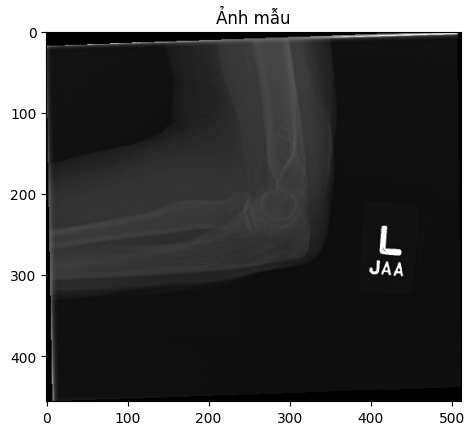

In [19]:
# Hiển thị ảnh mẫu từ thư mục train
import cv2
import matplotlib.pyplot as plt

sample_image_path = Path("data/MURA-v1.1/train/XR_ELBOW/patient00011/study1_negative/image1.png")
image = cv2.imread(str(sample_image_path), cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title(f"Ảnh mẫu")
plt.show()

## Khám phá bộ dữ liệu

In [ ]:
# Đọc file CSV chứa thông tin nhãn
db_train = pd.read_csv(base_dir / "train_labeled_studies.csv")
db_valid = pd.read_csv(base_dir / "valid_labeled_studies.csv")
train_image_paths = pd.read_csv(base_dir / "train_image_paths.csv")


Tập train:

Thông tin nhãn từ file CSV:
  MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/  1
0  MURA-v1.1/train/XR_SHOULDER/patient00002/study...         1
1  MURA-v1.1/train/XR_SHOULDER/patient00003/study...         1
2  MURA-v1.1/train/XR_SHOULDER/patient00004/study...         1
3  MURA-v1.1/train/XR_SHOULDER/patient00005/study...         1
4  MURA-v1.1/train/XR_SHOULDER/patient00006/study...         1
Số lượng ảnh bất thường : 5176
Số lượng ảnh bình thường: 8280

Tập valid:
Số lượng ảnh bất thường : 537
Số lượng ảnh bình thường: 661

Tổng cả tập train và valid:
Số lượng ảnh bất thường : 5713
Số lượng ảnh bình thường: 8941
Tổng số ảnh: 14654
